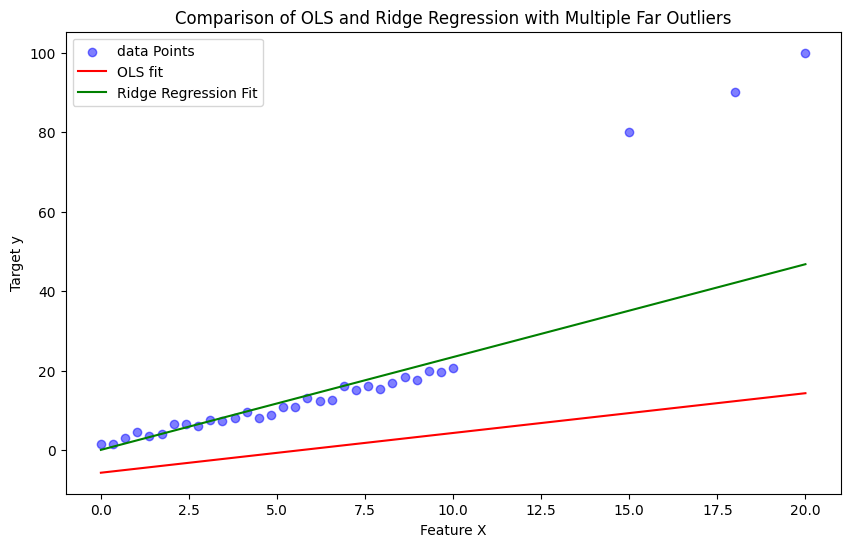

In [7]:
### Day 23
import numpy as np
import matplotlib.pyplot as plt

### Set a random seed for reproducibility
np.random.seed(42)

### generate a simple linear dataset
n_samples=30
X_input=np.linspace(0,10,n_samples)
y=2*X_input+1+np.random.randn(n_samples)  # y=2x+noise

### Add 3 impactful outliers
X_input=np.append(X_input,[15,18,20])
y=np.append(y,[80,90,100])


## Add the intercept term
X=np.hstack([np.ones((n_samples+3,1)),X_input.reshape(-1,1)]) ### adding columns of 1 (or Augmentation)


### Compute OLS and Ridge regression solutions
beta_OLS=np.linalg.inv(X.T@X)@X.T@y   ### using the formula (WtW)-1(WtT), W=X,T=Y
lambda_ridge=1000
I=np.eye(X.shape[1])
beta_ridge=np.linalg.inv(X.T@X+lambda_ridge*I)@X.T@y ### Using [XtX+lam(ridge)I]-1 *XtY

### Prepare to plot
plt.figure(figsize=(10,6))
plt.scatter(X_input,y,color='blue',alpha=0.5,label='data Points')


### Plot the OLS fit
x_range=np.linspace(np.min(X_input),np.max(X_input),100)
y_OLS=beta_OLS[0]+beta_OLS[1]+x_range
plt.plot(x_range,y_OLS,'r-',label='OLS fit')

### Plot the ridge regression fit
y_Ridge=beta_ridge[0]+beta_ridge[1]*x_range
plt.plot(x_range,y_Ridge,'g-',label='Ridge Regression Fit')


plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Comparison of OLS and Ridge Regression with Multiple Far Outliers')
plt.legend()
plt.show()

In [8]:
beta_OLS

array([-10.22115848,   4.5894277 ])